# Problem 1

**Generating Song Lyrics with NumPy**

**Scenario:** You are working on a RAG-based application that generates creative text formats like song lyrics. You have a dataset of existing popular song lyrics stored in a CSV file. Your task is to use NumPy to:

1. Load the song lyrics data from the CSV file.
2. Preprocess the data by converting all lyrics to lowercase and removing punctuation.
3. Use NumPy to create a random sample of 10 song lyrics from the dataset.

**Dataset :**

[**Lyrics Sample Dataset**](https://docs.google.com/spreadsheets/d/1GmUxCf1m-I94DsVMUaOsTikvh9QqFZpjmLvtNI61ylA/edit?usp=sharing)

In [ ]:
import pandas as pd

df = pd.read_csv("lyrics_dataset.csv")
print(df.head())

                                          Lyrics
0     I wanna dance with somebody (who loves me)
1       You're the one that I want, oohoo, honey
2                           Baby, baby, baby, oh
3  A sky full of stars and a heart full of scars
4             Can't stop the feeling! So excited


In [ ]:
import string
df["Lyrics"] = df["Lyrics"].str.lower()
df["Lyrics"] = df["Lyrics"].str.replace(f"[{string.punctuation}]", "", regex=True)

print(df.head())

                                          Lyrics
0       i wanna dance with somebody who loves me
1          youre the one that i want oohoo honey
2                              baby baby baby oh
3  a sky full of stars and a heart full of scars
4               cant stop the feeling so excited


In [ ]:
import numpy as np

np.random.seed(42)
sample_lyrics = np.random.choice(df["Lyrics"], size=10, replace=False)

for i, lyric in enumerate(sample_lyrics, 1):
    print(f"{i}. {lyric}")


1. i believe i can fly
2. its gettin hot in here so take off all your clothes
3. a little bit of monica in my life
4. a thousand miles from nowhere
5. bohemian rhapsody is the best song ever
6. livin on a prayer
7. my heart will go on
8. i wanna dance with somebody who loves me
9. cant buy me love
10. mmm mmm mmm mmm


# Problem 2

**Scenario**: You are building a RAG-based system to analyze customer reviews and classify them as positive or negative. You have a dataset of customer reviews stored in a CSV file, along with their sentiment labels (positive or negative). Here's your task:

1. Load the customer review data from the CSV file using Pandas.
2. Preprocess the review text by converting it to lowercase and removing punctuation.
3. Calculate the average word count for positive and negative reviews.
4. Visualize the distribution of word count for positive and negative reviews using Matplotlib
5. Plot a positive review and observe it should be near the positive sentiments clusters

**Dataset:**

[**Customer Review**](https://docs.google.com/spreadsheets/d/1C0YjGQ-SONdXS-fqmrNe3Uus5xS3e91izsZFxZN5doA/edit?usp=sharing)

In [ ]:
import pandas as pd

df = pd.read_csv("customer_review.csv")
print(df.head())


                                              Review Sentiment
0  "This product is amazing! It works exactly as ...  positive
1  "This product is a complete waste of money. It...  negative
2  "The product is okay, but it could be better. ...   neutral
3  "I love this product! It's so cute and stylish...  positive
4  "The product arrived broken. I am very unhappy...  negative


In [ ]:
import string

df["Review"] = df["Review"].str.lower()
df["Review"] = df["Review"].str.replace(f"[{string.punctuation}]", "", regex=True)

print(df.head())

                                              Review Sentiment
0  this product is amazing it works exactly as ad...  positive
1  this product is a complete waste of money it d...  negative
2  the product is okay but it could be better the...   neutral
3  i love this product its so cute and stylish iv...  positive
4  the product arrived broken i am very unhappy w...  negative


In [ ]:
df["word_count"] = df["Review"].apply(lambda x: len(x.split()))


avg_word_count = df.groupby("Sentiment")["word_count"].mean()
print("\nAverage Word Count by Sentiment:\n", avg_word_count)


Average Word Count by Sentiment:
 Sentiment
negative    16.125000
neutral     18.285714
positive    16.000000
Name: word_count, dtype: float64


In [ ]:
df

,Review,Sentiment,word_count
0,this product is amazing it works exactly as ad...,positive,24
1,this product is a complete waste of money it d...,negative,21
2,the product is okay but it could be better the...,neutral,30
3,i love this product its so cute and stylish iv...,positive,16
4,the product arrived broken i am very unhappy w...,negative,22
5,the product is good for the price its not the ...,neutral,18
6,this product is exactly what i was looking for...,positive,20
7,the product is very difficult to use i wouldnt...,negative,13
8,im not sure what to think of this product yet ...,neutral,27
9,this product is a lifesaver it has helped me s...,positive,16


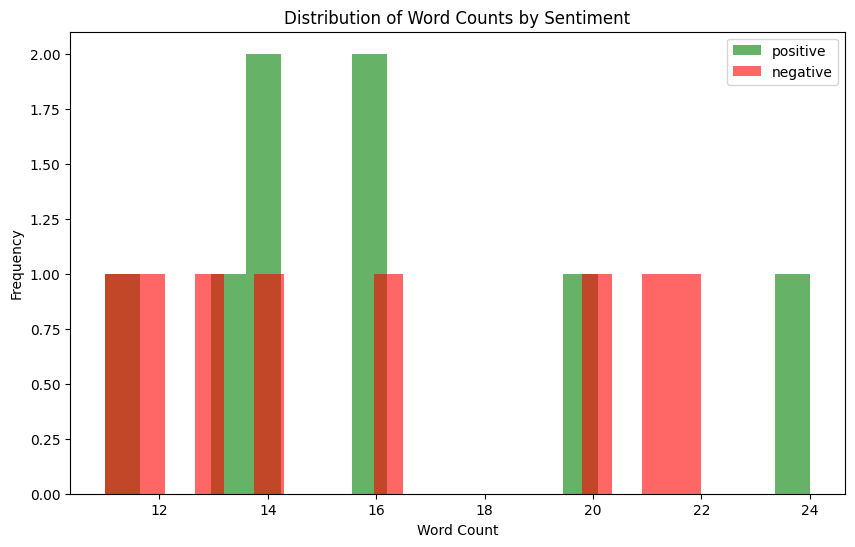

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for sentiment, color in zip(['positive', 'negative'], ['green', 'red']):
    subset = df[df['Sentiment'] == sentiment]
    plt.hist(
        subset['word_count'],
        bins=20,
        alpha=0.6,
        color=color,
        label=sentiment
    )
plt.title("Distribution of Word Counts by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

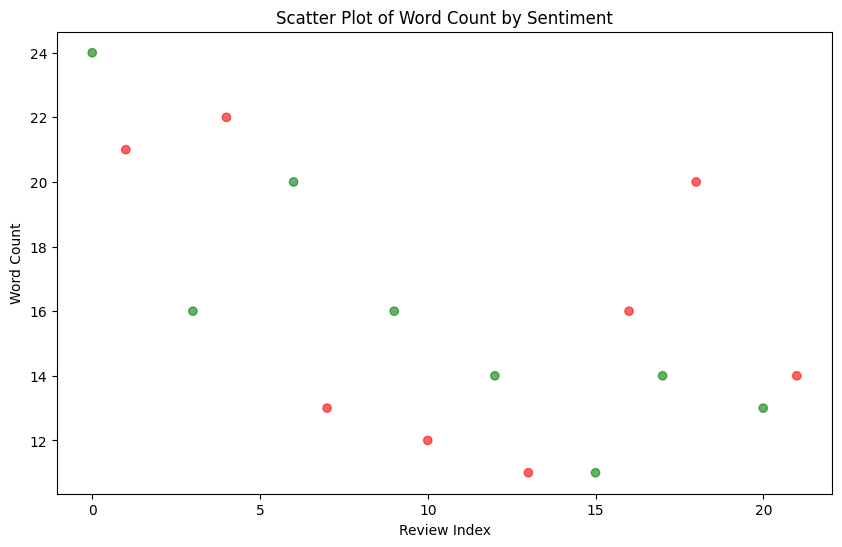

In [ ]:
colors = {'positive': 'green', 'negative': 'red'}

df = df[df['Sentiment'].isin(['positive', 'negative'])]

plt.figure(figsize=(10, 6))
plt.scatter(
    df.index,
    df['word_count'],
    c=df['Sentiment'].map(colors),
    alpha=0.6
)

plt.title("Scatter Plot of Word Count by Sentiment")
plt.xlabel("Review Index")
plt.ylabel("Word Count")
plt.show()


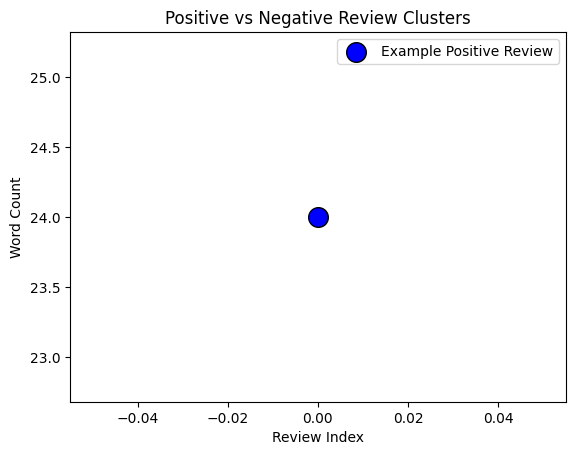

In [ ]:
example_index = df[df["Sentiment"]=="positive"].index[0]
plt.scatter(example_index, df.loc[example_index,"word_count"], c="blue", s=200, edgecolors="black", label="Example Positive Review")

plt.title("Positive vs Negative Review Clusters")
plt.xlabel("Review Index")
plt.ylabel("Word Count")
plt.legend()
plt.show()